<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Rupeecircle_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox(in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.fintelligence.rupeecircle',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a696407b-3588-46f7-98f3-830db0fad382,Prabu S,https://play-lh.googleusercontent.com/a-/ACB-R...,I have been an investor with rupees for more t...,1,13,1.37,2023-04-08 07:04:24,None,NaT,1.37
1,97aea321-30b8-48e4-a84a-03a6a69895cb,Durgesh Kumar79,https://play-lh.googleusercontent.com/a-/ACB-R...,rupeeCircle is an excellent platform for anyon...,5,1,1.35,2023-02-15 10:54:29,"Hi, thank you very much for your feedback",2023-02-17 05:23:48,1.35
2,f368c37c-51ff-44eb-aaff-dcba4ca64e3f,Manishas kitchen,https://play-lh.googleusercontent.com/a-/ACB-R...,"I have applied through website, am trying to l...",1,3,1.37,2023-04-03 14:14:19,None,NaT,1.37
3,07982506-f437-4759-88ca-1ffddfa54d80,Kartar Singh,https://play-lh.googleusercontent.com/a/AGNmyx...,The best thing about this app is that it's eas...,5,1,1.35,2023-02-04 16:18:27,"Hi, thank you very much for your feedback.",2023-02-06 05:49:35,1.35
4,f4f8efd9-60ec-4fdf-adac-92ab8bdd5861,Glo Wie,https://play-lh.googleusercontent.com/a/AGNmyx...,I would like to say that this app is very easy...,5,1,1.35,2023-02-04 14:50:32,"Hi, thank you very much for your feedback.",2023-02-06 05:49:30,1.35


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              261 non-null    object        
 1   userName              261 non-null    object        
 2   userImage             261 non-null    object        
 3   content               261 non-null    object        
 4   score                 261 non-null    int64         
 5   thumbsUpCount         261 non-null    int64         
 6   reviewCreatedVersion  197 non-null    object        
 7   at                    261 non-null    datetime64[ns]
 8   replyContent          177 non-null    object        
 9   repliedAt             177 non-null    datetime64[ns]
 10  appVersion            197 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 22.6+ KB


In [6]:
#df_reviews.to_csv('12club_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

1    139
5     93
4     13
3      9
2      7
Name: score, dtype: int64

<Axes: ylabel='score'>

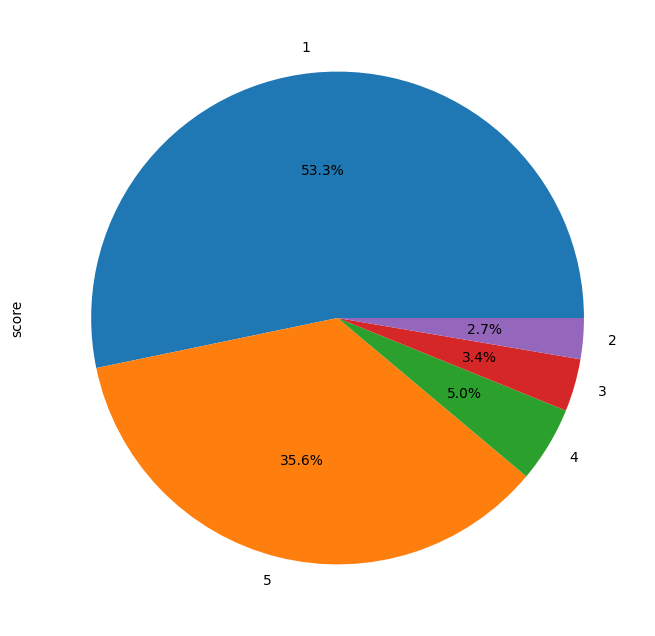

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,I have been an investor with rupees for more t...,1
1,rupeeCircle is an excellent platform for anyon...,5
2,"I have applied through website, am trying to l...",1
3,The best thing about this app is that it's eas...,5
4,I would like to say that this app is very easy...,5


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: I have been an investor with rupees for more than a year. I'm not satisfied by the performance. I haven't received emi for long period always getting same response from customer support. Same updates. I'm not even get emi even after tenure is over. Among 4 borrowers only one loan closed all other borrowers paid only only emi almost a year gone. For all tenure is over. I suggest not to take risk as a lender in this app.till date no improvement
Review Content Sentiment: mixed
Review Content Score: 1
Review Content: rupeeCircle is an excellent platform for anyone looking to invest their money and make the most of their returns. The user interface is straightforward and the investment options are good. Plus, you get access to attractive returns and exclusive investment opportunities. With rupeeCircle, investing is not only easy but also secure.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: I have applied through website, am trying to login but n

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

negative    110
positive    108
neutral      27
mixed        16
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

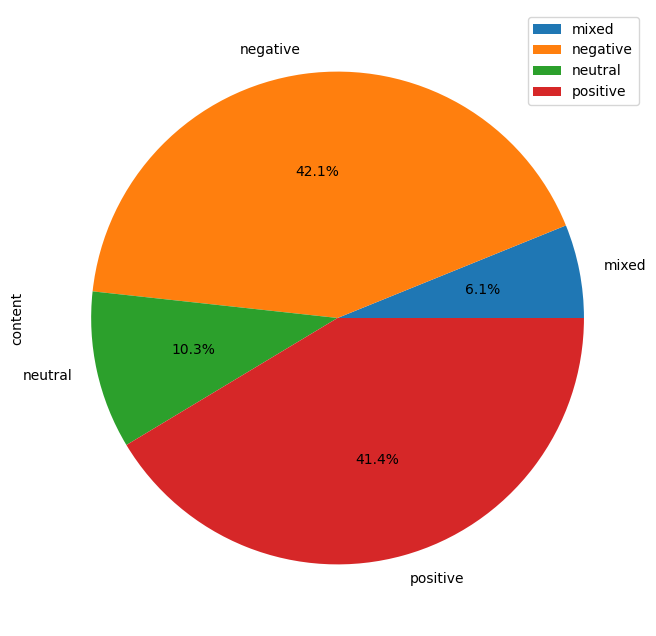

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 13
           4                  3
negative   1                100
           2                  4
           3                  4
           5                  2
neutral    1                 18
           2                  2
           3                  2
           5                  5
positive   1                  8
           2                  1
           3                  3
           4                 10
           5                 86
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

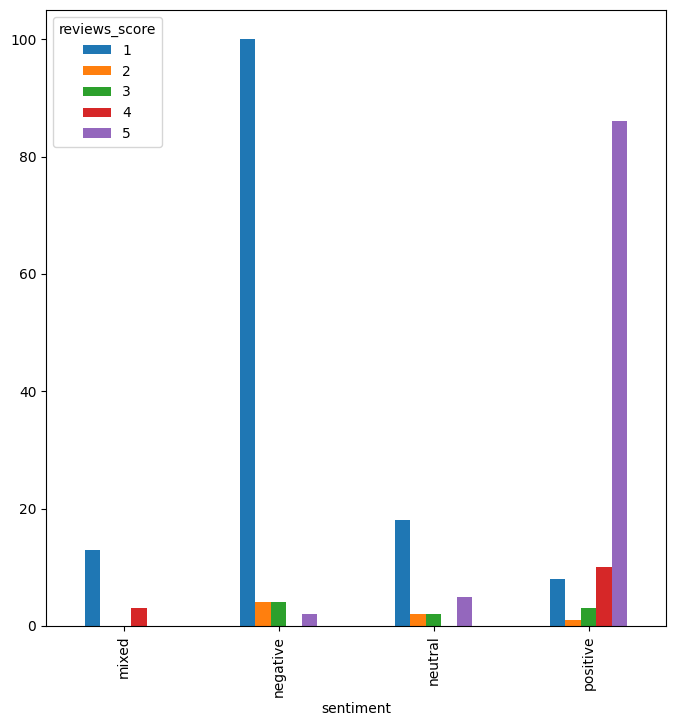

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        261 non-null    object
 1   sentiment      261 non-null    object
 2   reviews_score  261 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [20]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [21]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [22]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [23]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        261 non-null    object
 1   sentiment      261 non-null    int64 
 2   reviews_score  261 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.2+ KB


In [24]:
reviews_content_sentiment.to_csv('rupeecircle.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,I have been an investor with rupees for more t...,mixed,1
1,rupeeCircle is an excellent platform for anyon...,positive,5
2,"I have applied through website, am trying to l...",negative,1
3,The best thing about this app is that it's eas...,positive,5
4,I would like to say that this app is very easy...,positive,5


In [25]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 13
           4                  3
1          1                  8
           2                  1
           3                  3
           4                 10
           5                 86
2          1                100
           2                  4
           3                  4
           5                  2
3          1                 18
           2                  2
           3                  2
           5                  5
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

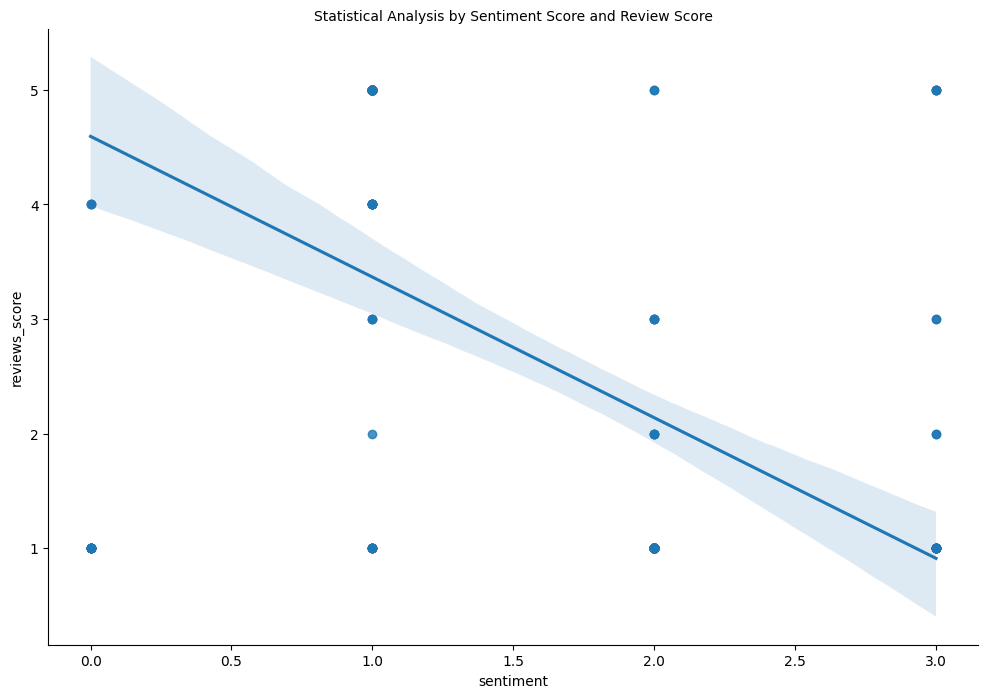

In [26]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.